# Pixel vs Histogram

This notebook shows the consequences of the different features to compare images with. 

In [1]:
#### SETUP STUFF ####

# Imports
import os
import glob
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from knn_classifier import kNearestNeighbor

from util import time_function, extract_hist, image_to_feature_vector, convert_label_to_number
from util import cross_val, print_info, plot_image_samples, multiband_threshold, smooth

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (128, 128) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import background mask
bgd_mask = cv2.imread('bgd_mask.jpg', cv2.IMREAD_COLOR)

def compute_dists(a, b):
    """ Computes the distance betwenn vector a and b """
    
    dist = np.sqrt(np.sum( (b - a)**2))

    return dist

## Comparing images from same class

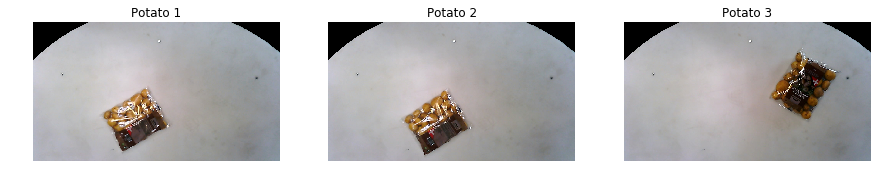

In [2]:
# Import images
potatos = []
potatos.append(cv2.imread('potato1.jpg', cv2.IMREAD_COLOR))
potatos.append(cv2.imread('potato2.jpg', cv2.IMREAD_COLOR))
potatos.append(cv2.imread('potato3.jpg', cv2.IMREAD_COLOR))

# Remove unnessary background
potatos = [cv2.bitwise_and(img, bgd_mask) for img in potatos]

# Plot images
plt.figure(figsize=(15, 15))
for i, potato in enumerate(potatos):
    plt.subplot(1, 3, (i+1))
    plt.imshow(cv2.cvtColor(potato, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Potato ' + str(i+1))
plt.show()

### Comparing images by pixels

In [3]:
# Resize the images
size=(128, 128)
potatos = [cv2.resize(img, size) for img in potatos]

# Flatten the images to big vectors
pixels = [img.flatten() for img in potatos]

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 2:', compute_dists(pixels[0], pixels[1]))

# Computer distance between potato 1 and 3
print('\nDistance between potato 1 and 3:', compute_dists(pixels[0], pixels[2]))


Distance between potato 1 and 2: 1378.2949611748568

Distance between potato 1 and 3: 2273.660484768999


### Comparing images by histogram

In [4]:
# Extract histogram of each image
hists = [extract_hist(img, bins=(32, 32, 32)) for img in potatos]

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 2:', compute_dists(hists[0], hists[1]))

# Compute distance between potato 1 and 2
print('\nDistance between potato 1 and 3:', compute_dists(hists[0], hists[2]))


Distance between potato 1 and 2: 0.49695033

Distance between potato 1 and 3: 0.7980915


## Comparing potato with other images

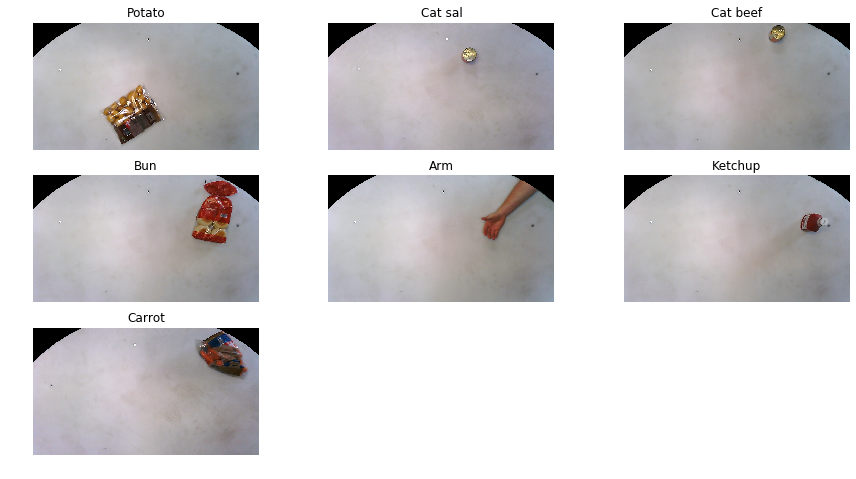

In [5]:
txt = ['Potato', 'Cat sal', 'Cat beef', 'Bun', 'Arm', 'Ketchup', 'Carrot']

# Load images
images = [
    cv2.imread('potato2.jpg', cv2.IMREAD_COLOR),
    cv2.imread('cat_sal.jpg', cv2.IMREAD_COLOR),
    cv2.imread('cat_beef.jpg', cv2.IMREAD_COLOR),
    cv2.imread('bun.jpg', cv2.IMREAD_COLOR),
    cv2.imread('arm.jpg', cv2.IMREAD_COLOR),
    cv2.imread('ketchup.jpg', cv2.IMREAD_COLOR),
    cv2.imread('carrot.jpg', cv2.IMREAD_COLOR)
]

# Remove unnessary background
images = [cv2.bitwise_and(img, bgd_mask) for img in images]

# Plot images
plt.figure(figsize=(15, 15))
for i, img in enumerate(images):
    plt.subplot(3, 3, (i+1))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(txt[i])
plt.subplots_adjust(bottom=0.5, top=0.9)
plt.show()

### Comparing pixels

In [6]:
# Resize the images
size=(128, 128)
pixels = [cv2.resize(img, size) for img in images]

# Flatten the images to big vectors
pixels = [img.flatten() for img in pixels]

# Compute distance between potato and the other images
for i, pixel in enumerate(pixels):
    if i > (len(pixels) - 2):
        break
    
    text = '\nDistance between ' + txt[0] + ' and ' + txt[i+1] + ':'
    print(text, compute_dists(pixels[0], pixels[i+1]))


Distance between Potato and Cat sal: 1745.4337569784766

Distance between Potato and Cat beef: 1706.010550963856

Distance between Potato and Bun: 1656.797211489686

Distance between Potato and Arm: 1918.1749138178197

Distance between Potato and Ketchup: 1319.4229799423686

Distance between Potato and Carrot: 1838.0361802750238


In [7]:
# Extract histogram of each image
hists = [extract_hist(img, bins=(32, 32, 32)) for img in images]

# Compute distance between potato and the other images
for i, pixel in enumerate(pixels):
    if i > (len(pixels) - 2):
        break
    
    text = '\nDistance between ' + txt[0] + ' and ' + txt[i+1] + ':'
    print(text, compute_dists(hists[0], hists[i+1]))


Distance between Potato and Cat sal: 1.0433038

Distance between Potato and Cat beef: 0.69434315

Distance between Potato and Bun: 0.7117438

Distance between Potato and Arm: 0.81723744

Distance between Potato and Ketchup: 0.52328944

Distance between Potato and Carrot: 1.0481243
